# Projeto - Crédito para Financiamento de Imóveis

## Orientações gerais

O projeto de encerramento de curso será dividido em três partes e utilizado como avaliação dos módulos de Data Engineering, Data Science e AWS.

## Contextualização

A PyCoders Ltda., cada vez mais especializada no mundo da Inteligência Artificial e Ciência de Dados, foi procurada por uma fintech para desenvolver um projeto de concessão de crédito para imóveis. Nesse projeto, espera-se a criação de score que discrimine ao máximo os bons pagadores dos maus pagadores. Para isso, foi disponibilizada uma base de dados com milhares de casos de empréstimos do passado, com diversas características dos clientes. Deve ser entregue um modelo para realizar essa classificação. Por questões contratuais, o pagamento será realizado baseado no desempenho (ROC AUC).


## Base de Dados

Serão utilizadas bases de dados com informações cadastrais, histórico de crédito e balanços financeiros de diversos clientes. O conjunto de dados está dividido em treino e teste, todos no formato csv. Toda a modelagem, validação e avaliação deve ser feita em cima do conjunto de treino, subdividindo tal base como achar melhor. Existe também a base das variáveis explicativas, para ajudar no desenvolvimento do projeto.

[Baixar aqui](https://s3-sa-east-1.amazonaws.com/lcpi/0694c90a-7782-47f7-8bbc-e611d31f9f21.zip)



# Parte 1: Data Engineering

**Preparação:** Salve os arquivos `.csv` em `/FileStore/tables/projeto_credito/`, sem alterar seus nomes.

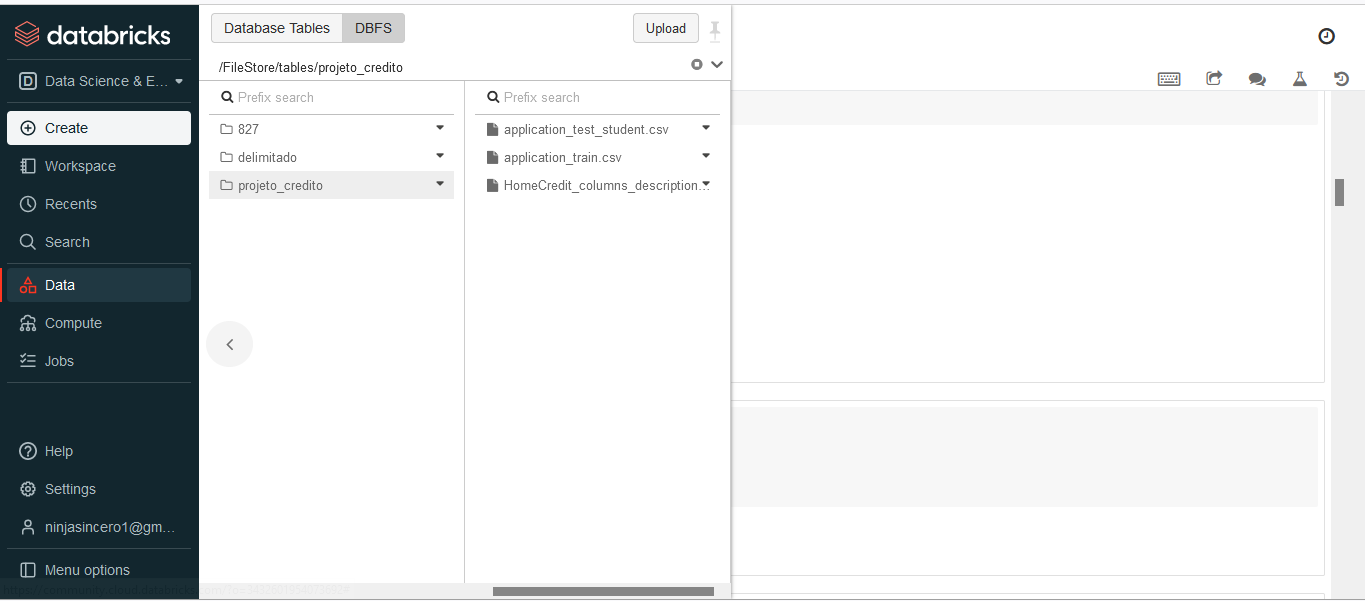

## Antes de modelar

1. Crie um `fluxo de dados` no Databricks para as bases que serão utiizadas.
    1. Insira os dados brutos na primeria camada.
    1. Salve as transformações / limpezas na segunda camada.
   
    1. Crie uma pipeline para o processo.
        1. Pipeline, nesse caso, será um único script que gere todas as tabelas acima.

## Durante a modelagem

1. Selecione e salve as colunas relevantes e features criadas na terceira camada.

1. Salve as versões do modelo no formato `pickle` no DBFS.

1. Mantenha o controle das versões criando uma tabela no formato
**ATENÇÂO:** Como estamos na versão community, lembre de exportar a tabela abaixo para o DBFS antes da sessão encerrar.

|id_modelo|nome_modelo|data_treino|método|roc_auc|tempo_de_treino(s)|hyperparametros|path_to_pickle
|---|---|---|---|---|---|---|---|
|1|RandomForestRapida|2022-02-22|Random Forest Simples|0.76|124|\[max_depth=4, ...\]|/FileStore/tables/modelos/...|

## Após modelar

1. Salve os dados de treino e validação em uma tabela (para que seja possível reproduzir resultados no futuro).
    1. Crie uma coluna com o id do modelo escolhido para refêrencia. 

## Regras de Entrega

1. Um notebook (databricks) com a pipeline que gere as tabelas da fase *Antes de modelar*. O notebook deve rodar de uma vez só!

1. Um arquivo `.csv` com as informações da tabela gerada na fase *Durante a modelagem*.

1. Um notebook que gere as tabelas de treino e validação do passo *Após modelar*. O notebook deve rodar de uma vez só!

> **IMPORTANTE:** Tendo em vista que não teremos apresentação do projeto (e não queromos pedir que vocês gravem um vídeo explicando o notebook, haha), é indispensável que ele esteja organizado e comentado.

# Parte 2: Data Science

## Requisitos Obrigatórios do Projeto

1. **Análise Exploratória dos Dados:** análise descritiva dos dados numéricos e categóricos, bem como gráficos (de sua preferência).
2. **Data Cleaning:** a base de dados apresenta dados ausentes. Sendo assim, você deverá realizar uma limpeza dos dados, removendo-os ou preenchendo com valores coerentes.
3. **Conversão de variáveis categóricas**
4. **Balanceamento de amostras:** nesse caso, como o dataset possui muitas amostras, você pode utilizar o NearMiss para realizar um *under sampling*.
5. **Machine Learning:** aplique algum algoritmo de ML, de sua preferência, dividindo o seu conjunto de dados em treino e teste, para obter o `roc_auc_score` de ambos os cenários (treino e teste).

## Regras de Entrega

1. Deve ser entregue uma base com as predições para a base de teste.
    - Essa base deverá ser um Data Frame com duas colunas: a primeira sendo o SK_ID_CURR e a segunda a probabilidade de inadimplência.
    - ⚠️ Entregar as predições com a probabilidade da inadimplência ocorrer.
2. Deve ser entregue o notebook com as etapas que foram aplicadas na criação do modelo (especificadas na subseção anterior).

> **IMPORTANTE:** Tendo em vista que não teremos apresentação do projeto (e não queromos pedir que vocês gravem um vídeo explicando o notebook, haha), é indispensável que ele esteja organizado e comentado.

<a href="https://s3-sa-east-1.amazonaws.com/lcpi/94acac51-8ce4-465b-a06d-a1cf19ec5d93.ipynb" style="display: block; background-color: #222; padding: 20px; text-align: center; font-weight: 600;">
Clique aqui para fazer o download do notebook com as instruções.
</a>

### Importação das bibliotecas:

In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

### Carregando e explorando dataset description:

In [2]:
# Carregando dataset description
df_description = pd.read_csv('HomeCredit_columns_description.csv', encoding='latin1')

In [3]:
df_description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   219 non-null    int64 
 1   Table        219 non-null    object
 2   Row          219 non-null    object
 3   Description  219 non-null    object
 4   Special      86 non-null     object
dtypes: int64(1), object(4)
memory usage: 8.7+ KB


In [4]:
df_description.head(10)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


In [5]:
df_description.tail(10)

,Unnamed: 0,Table,Row,Description,Special
209,212,previous_application.csv,DAYS_TERMINATION,Relative to application date of current applic...,time only relative to the application
210,213,previous_application.csv,NFLAG_INSURED_ON_APPROVAL,Did the client requested insurance during the ...,NaN
211,214,installments_payments.csv,SK_ID_PREV,ID of previous credit in Home credit related t...,hashed
212,215,installments_payments.csv,SK_ID_CURR,ID of loan in our sample,hashed
213,216,installments_payments.csv,NUM_INSTALMENT_VERSION,Version of installment calendar (0 is for cred...,NaN
214,217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
215,218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
216,219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
217,220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN
218,221,installments_payments.csv,AMT_PAYMENT,What the client actually paid on previous cred...,NaN


In [6]:
df_description.Table.unique()

array(['application_{train|test}.csv', 'bureau.csv', 'bureau_balance.csv',
       'POS_CASH_balance.csv', 'credit_card_balance.csv',
       'previous_application.csv', 'installments_payments.csv'],
      dtype=object)

### Copiando dataset description para limpeza:

In [7]:
df_description_cuted = df_description.copy()

In [8]:
df_description_cuted.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [9]:
filter_0 = df_description_cuted['Table'] == 'application_{train|test}.csv'

In [10]:
df_description_cuted = df_description_cuted[filter_0]

In [11]:
df_description_cuted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 121
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   122 non-null    int64 
 1   Table        122 non-null    object
 2   Row          122 non-null    object
 3   Description  122 non-null    object
 4   Special      56 non-null     object
dtypes: int64(1), object(4)
memory usage: 5.7+ KB


In [12]:
df_description_cuted.Table.unique()

array(['application_{train|test}.csv'], dtype=object)

### Carregando e explorando dataset train:

In [13]:
# Carregando dataset train
df_train = pd.read_csv('application_train.csv')
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,456162,0,Cash loans,F,N,N,0,112500.0,700830.0,22738.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,134978,0,Cash loans,F,N,N,0,90000.0,375322.5,14422.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
2,318952,0,Cash loans,M,Y,N,0,180000.0,544491.0,16047.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,3.0
3,361264,0,Cash loans,F,N,Y,0,270000.0,814041.0,28971.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
4,260639,0,Cash loans,F,N,Y,0,144000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,10.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246003,242114,0,Cash loans,F,N,Y,1,270000.0,1172470.5,34411.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,8.0
246004,452374,0,Cash loans,F,N,Y,0,180000.0,654498.0,27859.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
246005,276545,1,Revolving loans,M,N,N,1,112500.0,270000.0,13500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
246006,236776,1,Cash loans,M,Y,N,3,202500.0,204858.0,17653.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246008 entries, 0 to 246007
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 229.0+ MB


In [15]:
# Set to see all collumns of dataframe.
pd.set_option('display.max_columns', None)

In [16]:
# Set to see all rows of dataframe.
pd.set_option('display.max_rows', None)

In [17]:
df_train.head(8)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,456162,0,Cash loans,F,N,N,0,112500.0,700830.0,22738.5,585000.0,Unaccompanied,Working,Incomplete higher,Single / not married,House / apartment,0.019689,-8676,-813,-4163.0,-1363,NaN,1,1,1,1,0,0,Core staff,1.0,2,2,FRIDAY,17,0,0,0,1,1,0,Trade: type 2,NaN,0.699373,0.171468,0.0619,0.0302,0.9762,0.6736,0.0055,0.0,0.1034,0.1667,0.0417,0.0000,0.0504,0.0507,0.0,0.0,0.0630,0.0313,0.9762,0.6864,0.0055,0.0,0.1034,0.1667,0.0417,0.0000,0.0551,0.0528,0.0,0.0,0.0625,0.0302,0.9762,0.6780,0.0055,0.0,0.1034,0.1667,0.0417,0.0000,0.0513,0.0516,0.0,0.0,reg oper account,block of flats,0.0399,Block,No,0.0,0.0,0.0,0.0,-589.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,134978,0,Cash loans,F,N,N,0,90000.0,375322.5,14422.5,324000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-13583,-223,-3554.0,-3287,NaN,1,1,0,1,0,0,High skill tech staff,2.0,2,2,MONDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.541385,0.199651,0.768808,0.0227,0.0566,0.9806,0.7348,0.0161,0.0,0.1034,0.0417,0.0833,0.0133,0.0185,0.0184,0.0,0.0,0.0231,0.0587,0.9806,0.7452,0.0162,0.0,0.1034,0.0417,0.0833,0.0136,0.0202,0.0192,0.0,0.0,0.0229,0.0566,0.9806,0.7383,0.0162,0.0,0.1034,0.0417,0.0833,0.0135,0.0188,0.0187,0.0,0.0,reg oper account,block of flats,0.0158,Block,No,0.0,0.0,0.0,0.0,-1409.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
2,318952,0,Cash loans,M,Y,N,0,180000.0,544491.0,16047.0,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-13993,-6202,-7971.0,-4175,9.0,1,1,1,1,0,0,Managers,2.0,2,2,THURSDAY,15,0,0,0,0,0,0,Business Entity Type 1,NaN,0.704880,0.626304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [62]:
df_train.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE                int64
CODE_GENDER                       int64
FLAG_OWN_CAR                      int64
FLAG_OWN_REALTY                   int64
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                 float64
NAME_INCOME_TYPE                  int64
NAME_EDUCATION_TYPE               int64
NAME_FAMILY_STATUS                int64
NAME_HOUSING_TYPE                 int64
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [19]:
# Verificando e somando as possiveis linhas duplicadas.
df_train.duplicated().sum()

0

### Conversão das variáveis categóricas

In [20]:
# Verificando dados únicos das colunas:
df_train['CODE_GENDER'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [21]:
# Verificando dados únicos das colunas:
df_train['CODE_GENDER'].nunique()

3

In [22]:
# Mapeando variáveis categóricas:
# Substituindo o "F" por 0, o "M" por 1 e o "XNA" por 2
df_train['CODE_GENDER'] = df_train['CODE_GENDER'].map({'F': 0, 'M': 1, 'XNA': 2})

In [23]:
# Verificando dados únicos das colunas:
df_train['NAME_CONTRACT_TYPE'].unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

In [24]:
# Substituindo o "Cash loans" por 0 e o "Revolving loans" por 1
df_train['NAME_CONTRACT_TYPE'] = df_train['NAME_CONTRACT_TYPE'].map({'Cash loans': 0, 'Revolving loans': 1})

In [25]:
# Verificando dados únicos das colunas:
df_train['FLAG_OWN_CAR'].unique()

array(['N', 'Y'], dtype=object)

In [26]:
# Substituindo o "N" por 0 e o "Y" por 1
df_train['FLAG_OWN_CAR'] = df_train['FLAG_OWN_CAR'].map({'N': 0, 'Y': 1})

In [27]:
# Verificando dados únicos das colunas:
df_train['FLAG_OWN_REALTY'].unique()

array(['N', 'Y'], dtype=object)

In [28]:
# Substituindo o "N" por 0 e o "Y" por 1
df_train['FLAG_OWN_REALTY'] = df_train['FLAG_OWN_REALTY'].map({'N': 0, 'Y': 1})

In [29]:
# Verificando dados únicos das colunas:
df_train['NAME_TYPE_SUITE'].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Other_B',
       'Children', 'Other_A', nan, 'Group of people'], dtype=object)

In [30]:
# Substituindo os dados por números
df_train['NAME_TYPE_SUITE'] = df_train['NAME_TYPE_SUITE'].map({
    'Unaccompanied': 0, 
    'Family': 1,
    'Spouse, partner': 2,
    'Other_B': 3,
    'Children': 4,
    'Other_A': 5,
    'Group of people': 6
})

In [31]:
# Verificando dados únicos das colunas:
df_train['NAME_INCOME_TYPE'].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Businessman', 'Unemployed', 'Student', 'Maternity leave'],
      dtype=object)

In [32]:
# Substituindo os dados por números
df_train['NAME_INCOME_TYPE'] = df_train['NAME_INCOME_TYPE'].map({
    'Working': 0, 
    'Commercial associate': 1,
    'Pensioner': 2,
    'State servant': 3,
    'Businessman': 4,
    'Unemployed': 5,
    'Student': 6,
    'Maternity leave': 7
})

In [33]:
# Verificando dados únicos das colunas:
df_train['NAME_EDUCATION_TYPE'].unique()

array(['Incomplete higher', 'Secondary / secondary special',
       'Higher education', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [34]:
# Substituindo os dados por números
df_train['NAME_EDUCATION_TYPE'] = df_train['NAME_EDUCATION_TYPE'].map({
    'Incomplete higher': 0, 
    'Secondary / secondary special': 1,
    'Higher education': 2,
    'Lower secondary': 3,
    'Academic degree': 4
})

In [35]:
# Verificando dados únicos das colunas:
df_train['NAME_FAMILY_STATUS'].unique()

array(['Single / not married', 'Married', 'Separated', 'Widow',
       'Civil marriage', 'Unknown'], dtype=object)

In [36]:
# Substituindo os dados por números
df_train['NAME_FAMILY_STATUS'] = df_train['NAME_FAMILY_STATUS'].map({
    'Single / not married': 0, 
    'Married': 1,
    'Separated': 2,
    'Widow': 3,
    'Civil marriage': 4,
    'Unknown': 5
})

In [37]:
# Verificando dados únicos das colunas:
df_train['NAME_HOUSING_TYPE'].unique()

array(['House / apartment', 'Rented apartment', 'With parents',
       'Municipal apartment', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [38]:
# Substituindo os dados por números
df_train['NAME_HOUSING_TYPE'] = df_train['NAME_HOUSING_TYPE'].map({
    'House / apartment': 0, 
    'Rented apartment': 1,
    'With parents': 2,
    'Municipal apartment': 3,
    'Co-op apartment': 4,
    'Office apartment': 5
})

In [39]:
# Verificando dados únicos das colunas:
df_train['OCCUPATION_TYPE'].unique()

array(['Core staff', 'High skill tech staff', 'Managers', nan, 'Laborers',
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Accountants', 'Low-skill Laborers', 'Security staff',
       'Realty agents', 'Private service staff', 'Medicine staff',
       'Secretaries', 'HR staff', 'Waiters/barmen staff', 'IT staff'],
      dtype=object)

In [59]:
# Verificando dados únicos das colunas:
df_train['OCCUPATION_TYPE'].nunique()

18

In [61]:
df_train['OCCUPATION_TYPE'] = df_train['OCCUPATION_TYPE'].replace(df_train['OCCUPATION_TYPE'].unique(), np.arange(19))

In [40]:
# Verificando dados únicos das colunas:
df_train['WEEKDAY_APPR_PROCESS_START'].unique()

array(['FRIDAY', 'MONDAY', 'THURSDAY', 'TUESDAY', 'SATURDAY', 'WEDNESDAY',
       'SUNDAY'], dtype=object)

In [41]:
# Substituindo os dados por números
df_train['WEEKDAY_APPR_PROCESS_START'] = df_train['WEEKDAY_APPR_PROCESS_START'].map({
    'FRIDAY': 0, 
    'MONDAY': 1,
    'THURSDAY': 2,
    'TUESDAY': 3,
    'SATURDAY': 4,
    'WEDNESDAY': 5,
    'SUNDAY': 6
})

In [42]:
# Verificando dados únicos das colunas:
df_train['ORGANIZATION_TYPE'].unique()

array(['Trade: type 2', 'Business Entity Type 3',
       'Business Entity Type 1', 'XNA', 'Transport: type 4',
       'Self-employed', 'Industry: type 9', 'Industry: type 3',
       'Trade: type 7', 'Police', 'School', 'Mobile', 'Housing',
       'Government', 'Construction', 'Bank', 'Other', 'Industry: type 11',
       'Trade: type 1', 'Medicine', 'Industry: type 7', 'Kindergarten',
       'Business Entity Type 2', 'Security Ministries', 'Electricity',
       'Industry: type 4', 'Trade: type 3', 'Agriculture', 'Military',
       'Trade: type 6', 'Hotel', 'Security', 'Legal Services',
       'Industry: type 1', 'Restaurant', 'Industry: type 12', 'Services',
       'Realtor', 'University', 'Industry: type 5', 'Transport: type 2',
       'Industry: type 2', 'Advertising', 'Transport: type 3',
       'Emergency', 'Culture', 'Postal', 'Telecom', 'Insurance',
       'Transport: type 1', 'Cleaning', 'Industry: type 10',
       'Trade: type 4', 'Industry: type 6', 'Religion',
       'Industry

In [43]:
# Verificando dados únicos das colunas:
df_train['ORGANIZATION_TYPE'].nunique()

58

In [57]:
df_train['ORGANIZATION_TYPE'] = df_train['ORGANIZATION_TYPE'].replace(df_train['ORGANIZATION_TYPE'].unique(), np.arange(58))

In [45]:
# Verificando dados únicos das colunas:
df_train['FONDKAPREMONT_MODE'].unique()

array(['reg oper account', nan, 'reg oper spec account',
       'org spec account', 'not specified'], dtype=object)

In [46]:
# Substituindo os dados por números
df_train['FONDKAPREMONT_MODE'] = df_train['FONDKAPREMONT_MODE'].map({
    'reg oper account': 0, 
    'reg oper spec account': 1,
    'org spec account': 2,
    'not specified': 3
})

In [47]:
# Verificando dados únicos das colunas:
df_train['HOUSETYPE_MODE'].unique()

array(['block of flats', nan, 'specific housing', 'terraced house'],
      dtype=object)

In [48]:
# Substituindo os dados por números
df_train['HOUSETYPE_MODE'] = df_train['HOUSETYPE_MODE'].map({
    'block of flats': 0, 
    'specific housing': 1,
    'terraced house': 2
})

In [49]:
# Verificando dados únicos das colunas:
df_train['WALLSMATERIAL_MODE'].unique()

array(['Block', nan, 'Panel', 'Stone, brick', 'Monolithic', 'Others',
       'Wooden', 'Mixed'], dtype=object)

In [50]:
# Substituindo os dados por números
df_train['WALLSMATERIAL_MODE'] = df_train['WALLSMATERIAL_MODE'].map({
    'Block': 0, 
    'Panel': 1,
    'Stone, brick': 2,
    'Monolithic': 3,
    'Others': 4,
    'Wooden': 5,
    'Mixed': 6
})

In [51]:
# Verificando dados únicos das colunas:
df_train['EMERGENCYSTATE_MODE'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [52]:
# Substituindo os dados por números
df_train['EMERGENCYSTATE_MODE'] = df_train['EMERGENCYSTATE_MODE'].map({
    'No': 0, 
    'Yes': 1
})

In [65]:
# Matriz de correlação
df_train.corr()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002557,0.002782,0.000095,0.001462,0.001826,-0.000077,-0.002651,0.000156,0.000057,0.000315,0.000024,0.004073,0.001284,-0.000502,-0.001402,-0.000005,-0.002144,0.001836,-0.002560,-0.000174,0.002083,0.003137,-0.001796,-0.000073,0.004524,0.003005,-0.000822,-0.001710,-0.001410,0.001137,0.000899,0.003371,-0.001359,0.000358,0.001389,0.002699,-0.001356,0.000401,0.001454,-0.001803,0.001319,0.001310,0.002684,0.003921,-0.000606,0.001998,0.008445,0.000348,0.006202,-0.001272,0.006101,0.002384,0.003364,0.005889,0.003987,-0.003799,0.006509,0.003675,-0.000165,0.002206,0.007934,0.000408,0.005658,-0.001925,0.005666,0.001214,0.003264,0.005839,0.003733,-0.003059,0.005261,0.004252,-0.000244,0.001856,0.008285,0.000684,0.006190,-0.001183,0.005798,0.002092,0.003641,0.006094,0.004139,-0.003972,0.006240,0.001367,-0.000402,0.004859,-0.002485,0.000428,-0.001942,-0.002010,-0.001981,-0.000751,0.000739,0.001499,-0.003930,-0.004449,-0.000810,0.001486,-0.002993,0.002007,0.001068,-0.000351,-0.002229,-0.001172,-0.001036,-0.002298,0.003168,-0.000251,0.001622,0.000213,0.001389,0.000877,0.000714,-0.003660,-0.003445,0.003948,-0.000783,0.001091,0.004165
TARGET,-0.002557,1.000000,-0.031127,0.055201,-0.022705,-0.006532,0.019246,-0.002286,-0.031103,-0.014100,-0.040060,-0.003320,-0.059575,-0.043475,0.002038,0.018293,-0.036342,0.079414,-0.044862,0.041581,0.051572,0.036632,0.000599,0.045894,0.027436,-0.000284,-0.023610,-0.002106,0.024632,0.009386,0.059170,0.061518,0.002338,-0.023270,0.006782,0.006463,0.001755,0.045404,0.050255,0.031159,-0.001537,-0.158619,-0.160978,-0.179246,-0.029823,-0.023800,-0.010012,-0.022979,-0.017455,-0.033079,-0.020724,-0.043720,-0.031946,-0.011024,-0.026637,-0.033427,-0.004459,-0.014609,-0.027802,-0.021355,-0.009605,-0.022861,-0.015412,-0.031233,-0.018986,-0.042958,

### Machine Learning:

#### Aplicando regressão logística nos dados do Dataset de treino:

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
clf = LogisticRegression()

In [ ]:
X = df[['Fare']] # Considerando apenas a taxa paga pela pessoa
y = df['Survived']

### Carregando e explorando dataset application_test_student:

In [54]:
# Carregando dataset application_test_student
#df_test = pd.read_csv('application_test_student.csv')
#df_test.head()

In [55]:
#df_test.dtypes

# Parte 3: AWS

**TBD**